In [81]:
import pandas as pd
df = pd.read_excel('ANEXO II. Tabla de datos posterior a la eliminación de datos atípicos.xlsx', sheet_name='Datos')
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M:%S').dt.time
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import MaxNLocator
import numpy as np

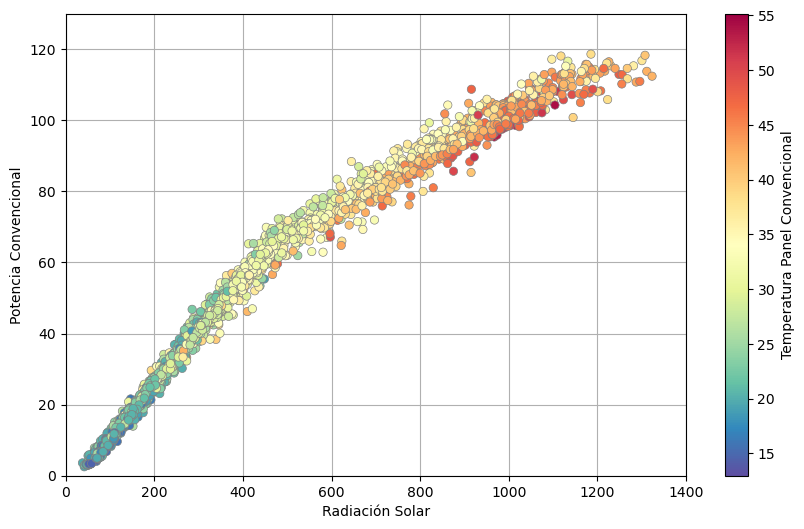

In [82]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='Radiación Solar', y='Potencia Convencional', hue='Temperatura Panel Convencional', palette='Spectral_r', legend=False, edgecolor='gray', zorder=2)
ax.grid(True, zorder=1)
ax.set_xlim(0, 1400)
ax.set_ylim(0, 130)
sm = ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=df['Temperatura Panel Convencional'].min(), vmax=df['Temperatura Panel Convencional'].max()))
sm.set_array([])
fig = plt.gcf()
cbar = fig.colorbar(sm, ax=ax,label='Temperatura Panel Convencional')
cbar.locator = MaxNLocator(nbins=10)
cbar.update_ticks()
plt.show()

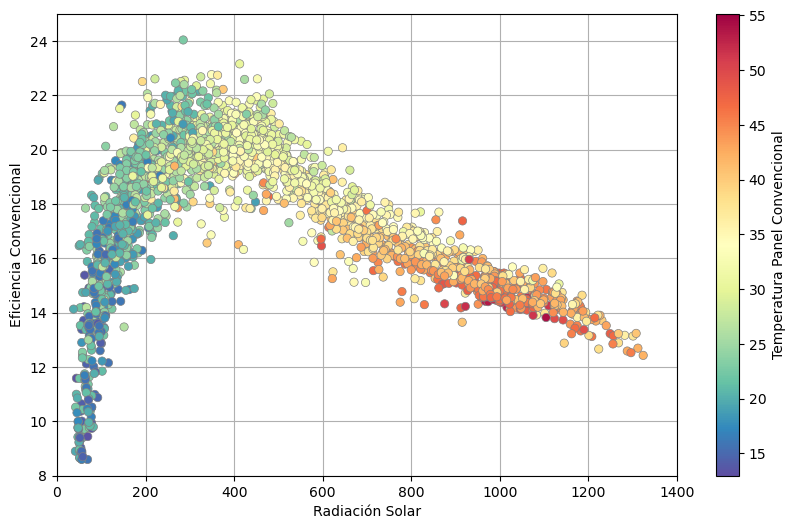

In [83]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='Radiación Solar', y='Eficiencia Convencional', hue='Temperatura Panel Convencional', palette='Spectral_r', legend=False, edgecolor='gray', zorder=2)
ax.grid(True, zorder=1)
ax.set_xlim(0, 1400)
ax.set_ylim(8, 25)
sm = ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=df['Temperatura Panel Convencional'].min(), vmax=df['Temperatura Panel Convencional'].max()))
sm.set_array([])
fig = plt.gcf()
cbar = fig.colorbar(sm, ax=ax,label='Temperatura Panel Convencional')
cbar.locator = MaxNLocator(nbins=10)
cbar.update_ticks()
plt.show()

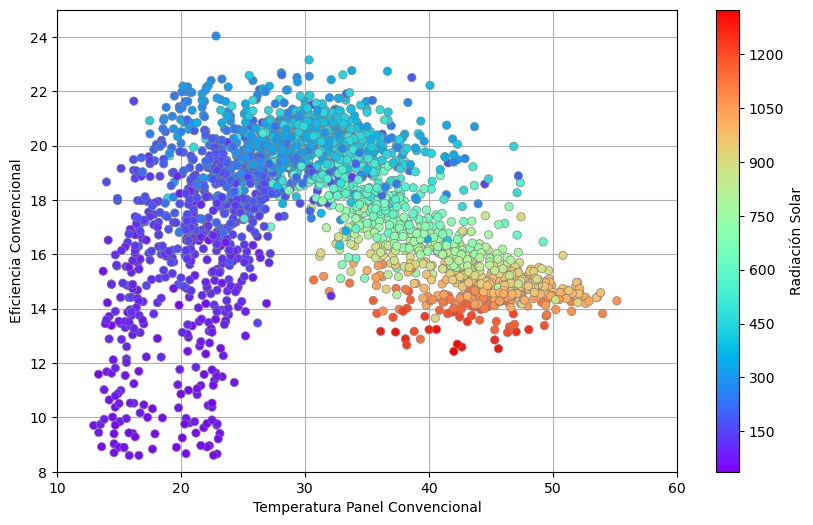

In [84]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='Temperatura Panel Convencional', y='Eficiencia Convencional', hue='Radiación Solar', palette='rainbow', legend=False, edgecolor='gray', zorder=2)
ax.grid(True, zorder=1)
ax.set_xlim(10, 60)
ax.set_ylim(8, 25)
sm = ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=df['Radiación Solar'].min(), vmax=df['Radiación Solar'].max()))
sm.set_array([])
fig = plt.gcf()
cbar = fig.colorbar(sm, ax=ax,label='Radiación Solar')
cbar.locator = MaxNLocator(nbins=10)
cbar.update_ticks()
plt.show()

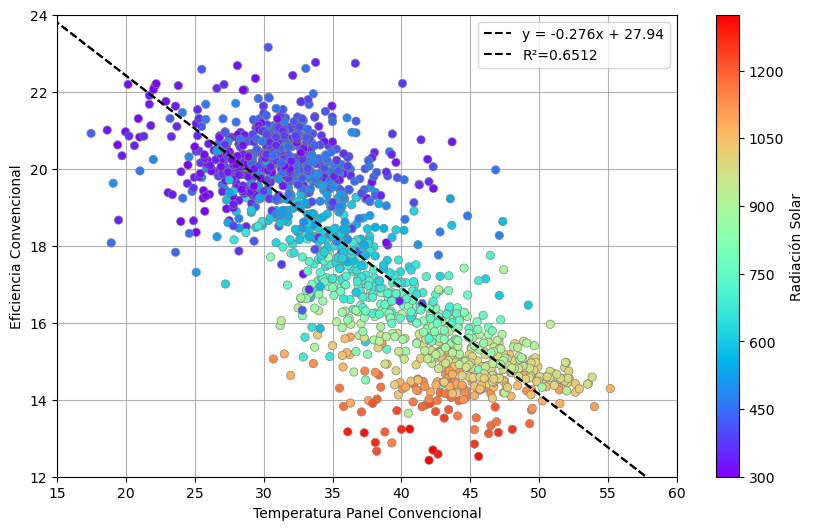

In [85]:
df_filtered = df[df['Radiación Solar'] >= 300]
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df_filtered, x='Temperatura Panel Convencional', y='Eficiencia Convencional', hue='Radiación Solar', palette='rainbow', legend=False, edgecolor='gray', zorder=2)
ax.grid(True, zorder=1)
ax.set_xlim(15, 60)
ax.set_ylim(12, 24)
x_values = np.linspace(10, 60, 100)
y_values = -0.276 * x_values + 27.94
ax.plot(x_values, y_values, color='black', linestyle='--', label='y = -0.276x + 27.94')
ax.plot(x_values, y_values, color='black', linestyle='--', label='R²=0.6512')
sm = ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=df_filtered['Radiación Solar'].min(), vmax=df_filtered['Radiación Solar'].max()))
sm.set_array([])
fig = plt.gcf()
cbar = fig.colorbar(sm, ax=ax,label='Radiación Solar')
cbar.locator = MaxNLocator(nbins=10)
cbar.update_ticks()
plt.legend()
plt.show()

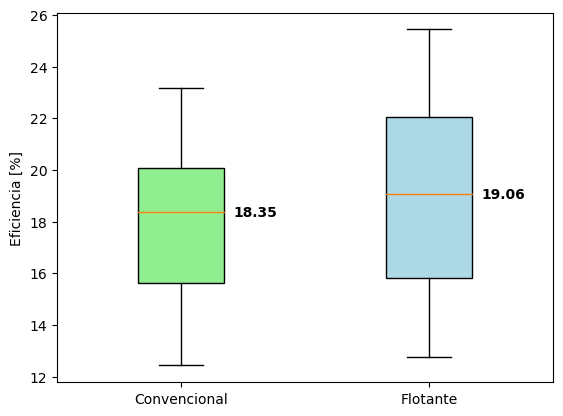

In [88]:
df_filtered = df[df['Radiación Solar'] >= 300]
fig, ax = plt.subplots()
bp_t = ax.boxplot(x=df_filtered['Eficiencia Convencional'], positions=[1], patch_artist=True, boxprops=dict(facecolor="lightgreen"), showfliers=False, widths=0.35)
bp_f = ax.boxplot(x=df_filtered['Eficiencia Flotante'], positions=[2], patch_artist=True, boxprops=dict(facecolor="lightblue"), showfliers=False, widths=0.35)
ax.text(1.3, df_filtered['Eficiencia Convencional'].median(), f'{df_filtered["Eficiencia Convencional"].median():.2f}', ha='center', va='center', color='black', fontweight='bold')
ax.text(2.3, df_filtered['Eficiencia Flotante'].median(), f'{df_filtered["Eficiencia Flotante"].median():.2f}', ha='center', va='center', color='black', fontweight='bold')
ax.set_ylabel('Eficiencia [%]', rotation=90, ha='center')
plt.xticks([1, 2], ['Convencional', 'Flotante'])
plt.show()

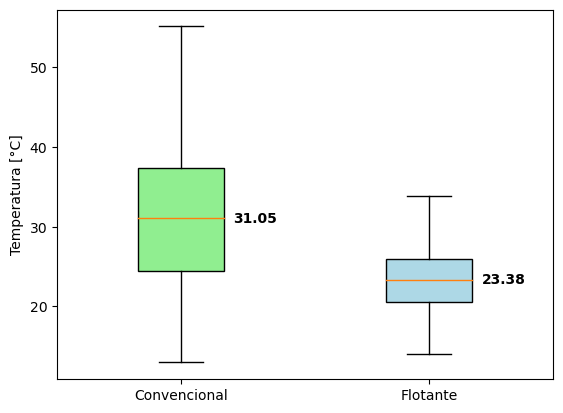

In [87]:
fig, ax = plt.subplots()
bp_t = ax.boxplot(x=df['Temperatura Panel Convencional'], positions=[1], patch_artist=True, boxprops=dict(facecolor="lightgreen"), showfliers=False, widths=0.35)
bp_f = ax.boxplot(x=df['Temperatura Panel Flotante'], positions=[2], patch_artist=True, boxprops=dict(facecolor="lightblue"), showfliers=False, widths=0.35)
ax.text(1.3, df['Temperatura Panel Convencional'].median(), f'{df["Temperatura Panel Convencional"].median():.2f}', ha='center', va='center', color='black', fontweight='bold')
ax.text(2.3, df['Temperatura Panel Flotante'].median(), f'{df["Temperatura Panel Flotante"].median():.2f}', ha='center', va='center', color='black', fontweight='bold')
ax.set_ylabel('Temperatura [°C]', rotation=90, ha='center')
plt.xticks([1, 2], ['Convencional', 'Flotante'])
plt.show()

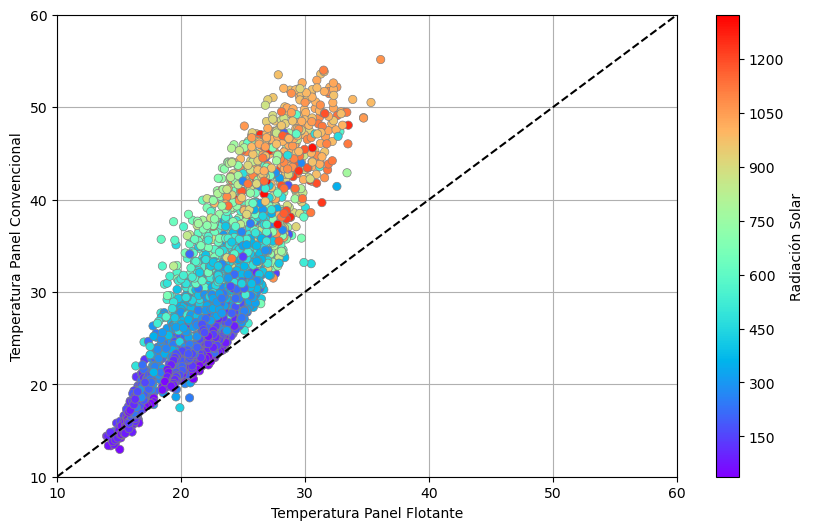

In [89]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='Temperatura Panel Flotante', y='Temperatura Panel Convencional', hue='Radiación Solar', palette='rainbow', legend=False, edgecolor='gray', zorder=2)
ax.grid(True, zorder=1)
ax.plot([10, 60], [10, 60], color='black', linestyle='--')
ax.set_xlim(10, 60)
ax.set_ylim(10, 60)
sm = ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=df['Radiación Solar'].min(), vmax=df['Radiación Solar'].max()))
sm.set_array([])
fig = plt.gcf()
cbar = fig.colorbar(sm, ax=ax,label='Radiación Solar')
cbar.locator = MaxNLocator(nbins=10)
cbar.update_ticks()
plt.show()

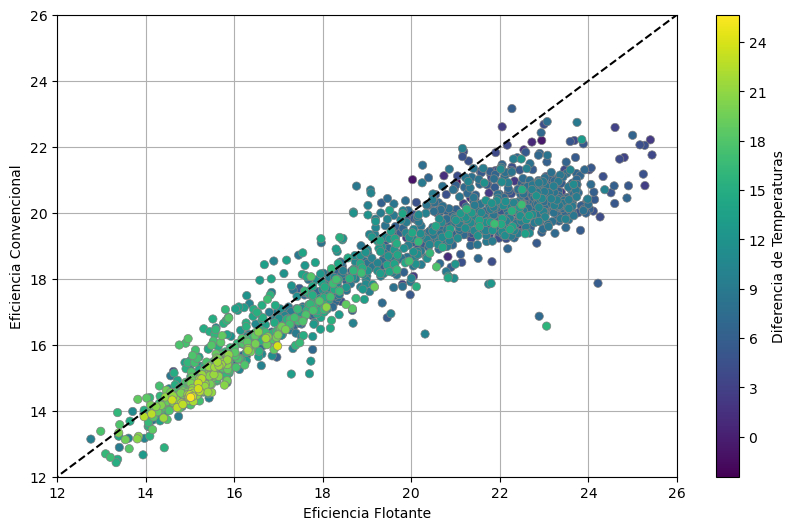

In [90]:
df_sorted = df.sort_values(by='Diferencia de Temperaturas', ascending=True)
df_filtered = df_sorted[df_sorted['Radiación Solar'] >= 300]
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df_filtered, x='Eficiencia Flotante', y='Eficiencia Convencional', hue='Diferencia de Temperaturas', palette='viridis', legend=False, edgecolor='gray', zorder=2)
ax.grid(True, zorder=1)
ax.plot([10, 60], [10, 60], color='black', linestyle='--')
ax.set_xlim(12, 26)
ax.set_ylim(12, 26)
sm = ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=df_filtered['Diferencia de Temperaturas'].min(), vmax=df_filtered['Diferencia de Temperaturas'].max()))
sm.set_array([])
fig = plt.gcf()
cbar = fig.colorbar(sm, ax=ax,label='Diferencia de Temperaturas')
cbar.locator = MaxNLocator(nbins=10)
cbar.update_ticks()
plt.show()

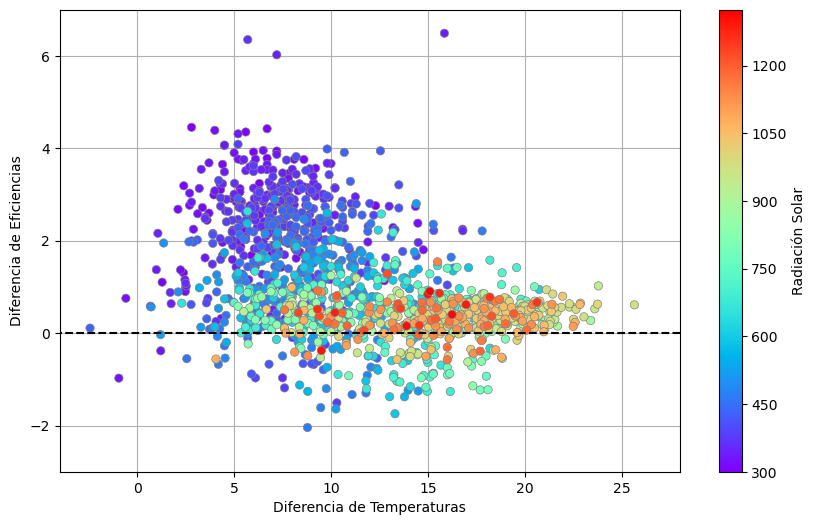

In [91]:
df_sorted = df.sort_values(by='Radiación Solar', ascending=True)
df_filtered = df_sorted[df_sorted['Radiación Solar'] >= 300]
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df_filtered, x='Diferencia de Temperaturas', y='Diferencia de Eficiencias', hue='Radiación Solar', palette='rainbow', legend=False, edgecolor='gray', zorder=2)
ax.grid(True, zorder=1)
ax.plot([-30, 30], [0, 0], color='black', linestyle='--')
ax.set_xlim(-4, 28)
ax.set_ylim(-3, 7)
sm = ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=df_filtered['Radiación Solar'].min(), vmax=df_filtered['Radiación Solar'].max()))
sm.set_array([])
fig = plt.gcf()
cbar = fig.colorbar(sm, ax=ax,label='Radiación Solar')
cbar.locator = MaxNLocator(nbins=10)
cbar.update_ticks()
plt.show()

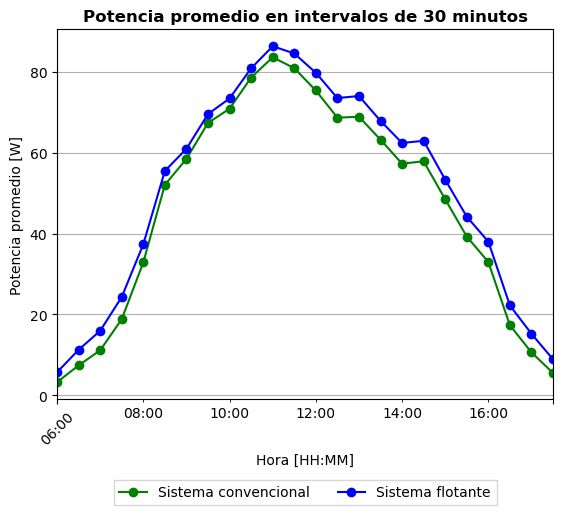

In [98]:
df = pd.read_excel('ANEXO II. Tabla de datos posterior a la eliminación de datos atípicos.xlsx', sheet_name='Datos')
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M:%S')
df.set_index('Hora', inplace=True)
df_resampled_t = df['Potencia Convencional'].resample('30T').mean()
df_resampled_f = df['Potencia Flotante'].resample('30T').mean()
start_time = pd.to_datetime('4:00 AM')
end_time = pd.to_datetime('7:30 PM')
df_resampled_t = df_resampled_t.between_time(start_time.time(), end_time.time())
df_resampled_f = df_resampled_f.between_time(start_time.time(), end_time.time())
df_resampled_t.plot(kind='line', marker='o', linestyle='-', color='green', label='Sistema convencional')
df_resampled_f.plot(kind='line', marker='o', linestyle='-', color='blue', label='Sistema flotante')
plt.title('Potencia promedio en intervalos de 30 minutos',fontweight='bold')
plt.xlabel('Hora [HH:MM]')
plt.ylabel('Potencia promedio [W]')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=2)
plt.savefig('Pvtiempo.pdf')
plt.show()